# AccelerateAI - LDA

This notebook aims to show the prediction using LDA with usage from sklearn family directly which is mentioned in Point 1 below. Point 2 demonstrates how the similar method can be leveraged using step wise mathematical computations from scratch using background computations.

It uses the wine dataset from UCI site as below.

Dataset Ref: https://archive-beta.ics.uci.edu/ml/datasets/wine

You can either download from UCI site or directly the CSV file from [GitHub here](https://github.com/Accelerate-AI/Data-Science-Global-Bootcamp/blob/main/05%20Logistic%20Regression/wine_data_UCI.csv).

## 1. LDA with sklearn

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
df = pd.read_csv('./wine_data_UCI.csv') 

df.sample(6)

,quality,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
155,3,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.900000,0.60,1.48,725
144,3,12.25,3.88,2.20,18.5,112,1.38,0.78,0.29,1.14,8.210000,0.65,2.00,855
171,3,12.77,2.39,2.28,19.5,86,1.39,0.51,0.48,0.64,9.899999,0.57,1.63,470
164,3,13.78,2.76,2.30,22.0,90,1.35,0.68,0.41,1.03,9.580000,0.70,1.68,615
111,2,12.52,2.43,2.17,21.0,88,2.55,2.27,0.26,1.22,2.000000,0.90,2.78,325
45,1,14.21,4.04,2.44,18.9,111,2.85,2.65,0.30,1.25,5.240000,0.87,3.33,1080


In [3]:
X = df.iloc[:,1:].copy()
y = df['quality'].copy()

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=124) 

In [5]:
# Instantiate the method and fit_transform the algotithm
# The n_components key word gives us the projection to the n most discriminative directions in the dataset. 
# We set this parameter to two to get a transformation in two dimensional space.
LDA = LinearDiscriminantAnalysis(n_components=2)   

data_projected = LDA.fit_transform(X_train,y_train)
print(data_projected.shape)

(124, 2)


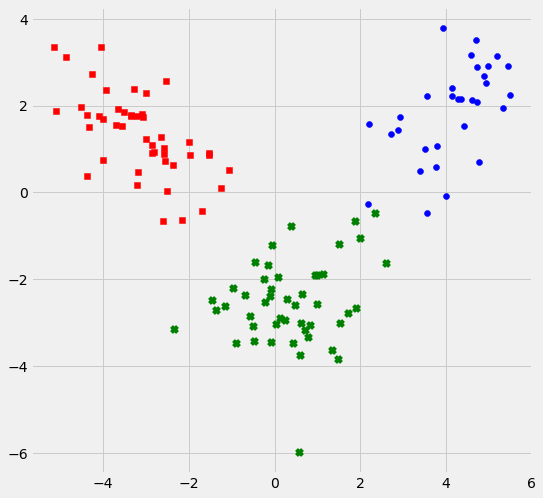

In [6]:
# Plot the transformed data
markers = ['s','x','o']
colors = ['r','g','b']

fig = plt.figure(figsize=(8,8))
ax0 = fig.add_subplot(111)

for l,m,c in zip(np.unique(y_train),markers,colors):
    ax0.scatter(data_projected[:,0][y_train==l],data_projected[:,1][y_train==l],c=c,marker=m)

## 2. LDA with Python from scratch

In [7]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [8]:
df = pd.read_csv('./wine_data_UCI.csv') 

df.sample(6)

,quality,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
103,2,11.82,1.72,1.88,19.5,86,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415
68,2,13.34,0.94,2.36,17.0,110,2.53,1.30,0.55,0.42,3.17,1.02,1.93,750
147,3,12.87,4.61,2.48,21.5,86,1.70,0.65,0.47,0.86,7.65,0.54,1.86,625
166,3,13.45,3.70,2.60,23.0,111,1.70,0.92,0.43,1.46,10.68,0.85,1.56,695
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625


In [9]:
X = df.iloc[:,1:].copy()
y = df['quality'].copy()

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=124) 

#### 1. Standardize the data

In [11]:
for col in X_train.columns:
    X_train[col] = StandardScaler().fit_transform(X_train[col].values.reshape(-1,1))

In [12]:
# Check after standardization
X_train.sample(4)

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
25,-0.035851,-0.236670,2.988339,1.712999,1.592777,0.451077,0.582611,0.881181,0.527630,-0.692881,0.651610,0.819067,0.138211
71,0.953396,-0.710435,1.038801,1.712999,-1.016808,0.953708,0.758363,-1.184948,0.440021,-0.778601,1.650532,0.762248,-1.179145
51,0.916757,-0.587607,0.790678,-0.571000,-0.467421,0.168346,0.885295,-1.105481,1.175934,0.172892,1.129355,1.060549,1.502615
62,0.721350,-0.938544,-1.619660,-0.336743,-0.467421,-0.381407,-0.286384,-0.310817,-1.557455,-0.598589,1.085924,-0.232088,-0.489101


#### 2. Compute the mean vector mu and the mean vector per class \begin{equation*} mu_k \end{equation*}

In [13]:
# Mean vector mu --> Since the data has been standardized, the data means are zero 
mu = np.mean(X_train,axis=0).values.reshape(13,1) 

mu_k = []

for i, j in enumerate(np.unique(df['quality'])):
    mu_k.append(np.mean(X_train.where(df['quality'] == j),axis=0))
mu_k = np.array(mu_k).T

In [14]:
mu_k

array([[ 0.81931914, -0.93934714,  0.20840759],
       [-0.23438148, -0.46533925,  1.05330623],
       [ 0.25821502, -0.38130765,  0.19495383],
       [-0.66775758,  0.25263538,  0.60783825],
       [ 0.37009412, -0.32130803, -0.06202749],
       [ 0.83897719, -0.14980905, -1.01780405],
       [ 0.91777065, -0.06139687, -1.26876765],
       [-0.56476382,  0.010431  ,  0.82222189],
       [ 0.5611499 , -0.11098096, -0.66441259],
       [ 0.19115398, -0.86751285,  1.03161356],
       [ 0.33342856,  0.51447825, -1.27478037],
       [ 0.76379192,  0.140259  , -1.3460194 ],
       [ 1.06840608, -0.75677671, -0.43800562]])

#### 3. Compute the Scatter within and Scatter between matrices \begin{equation*} S_W \end{equation*} \begin{equation*} S_B \end{equation*}

In [15]:
data_SW = []
Nc = []
for i, j in enumerate(np.unique(df['quality'])):
    a = np.array(X_train.where(df['quality'] == j).dropna().values-mu_k[:,i].reshape(1,13))
    data_SW.append(np.dot(a.T,a))
    Nc.append(np.sum(df['quality'] == j))
SW = np.sum(data_SW,axis=0)

SB = np.dot(Nc*np.array(mu_k-mu),np.array(mu_k-mu).T)

In [16]:
SW[0]

array([50.30296414,  1.21001415, -7.84889184, -1.64963377, -2.15992738,
       11.94678687,  3.26338464, -0.89855112,  4.6024288 , 15.80464916,
       -1.04902775,  1.21015541,  6.45974435])

In [17]:
SB[0]

array([104.3390524 ,  30.24202716,  39.86310125, -43.04791303,
        38.69899522,  40.36565787,  35.76745945, -19.7711184 ,
        27.88112146,  77.41775896, -30.94689886,  14.10219533,
        97.73714822])

#### 4. Compute the Eigenvalues and Eigenvectors of \begin{equation*} S_W^{-1} ,  S_B \end{equation*}

In [18]:
eigval, eigvec = np.linalg.eig(np.dot(np.linalg.inv(SW),SB))

#### 5. Select the two largest eigenvalues 

In [19]:
len(eigval)

13

In [20]:
eigen_pairs = [[np.abs(eigval[i]),eigvec[:,i]] for i in range(len(eigval))]
eigen_pairs = sorted(eigen_pairs,key=lambda k: k[0],reverse=True)
w = np.hstack((eigen_pairs[0][1][:,np.newaxis].real,eigen_pairs[1][1][:,np.newaxis].real)) # Select two largest

In [21]:
w

array([[-0.1509642 , -0.39815276],
       [ 0.07202467, -0.32875681],
       [-0.06347776, -0.35783493],
       [ 0.24964993,  0.35248185],
       [-0.01527891,  0.01569011],
       [ 0.14201321,  0.08194219],
       [-0.70511347,  0.18423562],
       [-0.04400986,  0.09199109],
       [ 0.05627731,  0.03800223],
       [ 0.36597723, -0.37510606],
       [-0.07468761,  0.18780672],
       [-0.34459858, -0.03339264],
       [-0.35314555, -0.50319287]])

#### 6. Transform the data with \begin{equation*} Y=X*w \end{equation*}

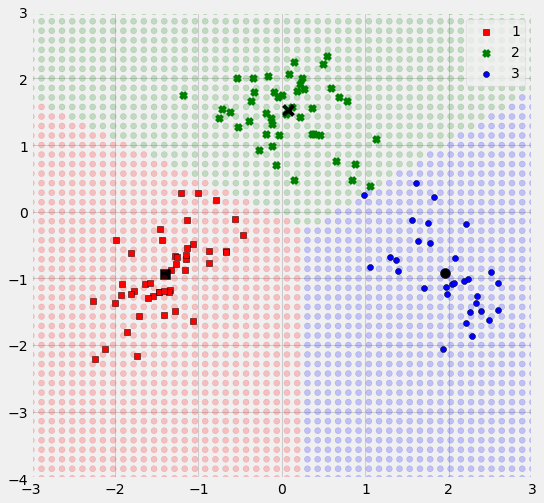

In [22]:
Y = X_train.dot(w)

# Plot the data
fig = plt.figure(figsize=(8,8))
ax0 = fig.add_subplot(111)
ax0.set_xlim(-3,3)
ax0.set_ylim(-4,3)

for l,c,m in zip(np.unique(y_train),['r','g','b'],['s','x','o']):
    ax0.scatter(Y[0][y_train==l],
                Y[1][y_train==l],
               c=c, marker=m, label=l,edgecolors='black')
ax0.legend(loc='upper right')

# Plot the voroni spaces
means = []

for m,target in zip(['s','x','o'],np.unique(y_train)):
    means.append(np.mean(Y[y_train==target],axis=0))
    ax0.scatter(np.mean(Y[y_train==target],axis=0)[0],np.mean(Y[y_train==target],axis=0)[1],marker=m,c='black',s=100)
   
mesh_x, mesh_y = np.meshgrid(np.linspace(-3,3),np.linspace(-4,3)) 
mesh = []


for i in range(len(mesh_x)):
    for j in range(len(mesh_x[0])):
        date = [mesh_x[i][j],mesh_y[i][j]]
        mesh.append((mesh_x[i][j],mesh_y[i][j]))


NN = KNeighborsClassifier(n_neighbors=1)
NN.fit(means,['r','g','b'])        
predictions = NN.predict(np.array(mesh))

ax0.scatter(np.array(mesh)[:,0],np.array(mesh)[:,1],color=predictions,alpha=0.2)


plt.show()